# Graded Challenge 1
`Izzan Dienurrahman`
`HCK-003`

## Description

### Background
- Wabah COVID-19 melanda berbagai negara di seluruh dunia termasuk Indonesia. Penulis ingin membandingkan perkembangan kasus COVID-19 antar negara khususnya negara tropis di berbagai benua guna mencari negara percontohan terbaik dalam penanganan kasus wabah COVID-19.

### Objective
- Membandingkan Perkembangan Kasus COVID19 di Beberapa Negara Tropis Pada Benua Asia(Indonesia & Cambodia), Afrika(Ethiopia) dan Amerika(Colombia) pada Periode 2020-2021.

### Problem Statement
- Membandingkan kasus yang terkonfirmasi antar negara pada tiap kuartal
- Membandingkan kasus kematian antar negara pada tiap kuartal
- Membandingkan kasus pemulihan antar negara pada tiap kuartal

## Query SQL Dataset
SELECT 
country_region,
province_state,
date,
confirmed,
deaths,
recovered,
admin2
FROM `bigquery-public-data.covid19_jhu_csse.summary`
WHERE  country_region IN ("Indonesia", "Malaysia", "Colombia", "Ethiopia")
AND (date >= '2020-01-01') AND (date < '2021-01-01')
ORDER BY date

Melakukan import library pandas

In [100]:
import pandas as pd

Mendefinisikan filter non-standard missing values untuk ditambahkan pada default missing values

In [101]:
pd.options.display.float_format = "{:,}".format

Menampilkan data dengan format *thousand separator*

In [102]:
missing_values = ["n/a", "na", "--"]

Membaca dataset dengan format csv ke dalam variable df

In [103]:
df = pd.read_csv('h8dsft_P0GC1_Izzan.csv', na_values=missing_values)

Menampilkan informasi umum pada dataset.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8379 entries, 0 to 8378
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_region  8379 non-null   object 
 1   province_state  7353 non-null   object 
 2   date            8379 non-null   object 
 3   confirmed       8377 non-null   float64
 4   deaths          8369 non-null   float64
 5   recovered       8370 non-null   float64
 6   admin2          0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 458.4+ KB


Menampilkan info 5 entri data teratas

In [105]:
df.head()

,country_region,province_state,date,confirmed,deaths,recovered,admin2
0,Malaysia,NaN,2020-01-23,NaN,NaN,NaN,NaN
1,Colombia,NaN,2020-01-23,NaN,NaN,NaN,NaN
2,Malaysia,NaN,2020-01-25,3.0,NaN,NaN,NaN
3,Malaysia,NaN,2020-01-26,4.0,NaN,NaN,NaN
4,Malaysia,NaN,2020-01-27,4.0,NaN,NaN,NaN


Menampilkan info 5 entri data terbawah

In [106]:
df.tail()

,country_region,province_state,date,confirmed,deaths,recovered,admin2
8374,Colombia,Vaupes,2020-12-31,"1,139.0",12.0,"1,120.0",NaN
8375,Colombia,Vichada,2020-12-31,"1,150.0",14.0,"1,125.0",NaN
8376,Ethiopia,NaN,2020-12-31,"124,264.0","1,923.0","112,096.0",NaN
8377,Indonesia,NaN,2020-12-31,"743,198.0","22,138.0","611,097.0",NaN
8378,Malaysia,NaN,2020-12-31,"113,010.0",471.0,"88,941.0",NaN


## Data Cleaning

### Renaming Dataset Column
Beberapa kolom pada dataset akan di rename untuk memudahkan proses eksplorasi

In [107]:
df.head()

,country_region,province_state,date,confirmed,deaths,recovered,admin2
0,Malaysia,NaN,2020-01-23,NaN,NaN,NaN,NaN
1,Colombia,NaN,2020-01-23,NaN,NaN,NaN,NaN
2,Malaysia,NaN,2020-01-25,3.0,NaN,NaN,NaN
3,Malaysia,NaN,2020-01-26,4.0,NaN,NaN,NaN
4,Malaysia,NaN,2020-01-27,4.0,NaN,NaN,NaN


In [108]:
df.rename(columns={'country_region':'country','province_state':'province','admin2':'admin'}, inplace=True)

### Missing Value / NA Value Checking
Melakukan pengecekan kolom-kolom yang memiliki entri value null/na.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8379 entries, 0 to 8378
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    8379 non-null   object 
 1   province   7353 non-null   object 
 2   date       8379 non-null   object 
 3   confirmed  8377 non-null   float64
 4   deaths     8369 non-null   float64
 5   recovered  8370 non-null   float64
 6   admin      0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 458.4+ KB


In [110]:
df.isna().sum()

country         0
province     1026
date            0
confirmed       2
deaths         10
recovered       9
admin        8379
dtype: int64

In [111]:
df.isnull().sum()

country         0
province     1026
date            0
confirmed       2
deaths         10
recovered       9
admin        8379
dtype: int64

Terlihat beberapa kolom yang perlu dibersihkan seperti 'province', 'confirmed', 'deaths', dan 'admin'.

### Handling Column 'admin'
Terlihat sebelumnya bahwa semua entri pada kolom admin memiliki missing/na value.

Melakukan drop kolom pada admin dengan alasan kolom admin tidak memberikan insight terhadap fokus permasalahan.

In [112]:
df.drop('admin', axis = 1, inplace = True)

In [113]:
df

,country,province,date,confirmed,deaths,recovered
0,Malaysia,NaN,2020-01-23,NaN,NaN,NaN
1,Colombia,NaN,2020-01-23,NaN,NaN,NaN
2,Malaysia,NaN,2020-01-25,3.0,NaN,NaN
3,Malaysia,NaN,2020-01-26,4.0,NaN,NaN
4,Malaysia,NaN,2020-01-27,4.0,NaN,NaN
...,...,...,...,...,...,...
8374,Colombia,Vaupes,2020-12-31,"1,139.0",12.0,"1,120.0"
8375,Colombia,Vichada,2020-12-31,"1,150.0",14.0,"1,125.0"
8376,Ethiopia,NaN,2020-12-31,"124,264.0","1,923.0","112,096.0"
8377,Indonesia,NaN,2020-12-31,"743,198.0","22,138.0","611,097.0"


### Handling Column 'province', 'confirmed', 'deaths', and 'recovered'

Pada kolom province_state masih terdapat null/na value, hal ini tidak masalah karena cakupan permasalahan adalah data suatu negara keseluruhan. Oleh karena itu, province_state yang memiliki value null/na akan direplace dengan string "Unknown" agar seragam seperti province_state "Unknown" lainnya. Sedangkan untuk kolom lainnya terlihat bahwa entri yang memiliki value null/na tidaklah begitu banyak maka untuk saat ini saya akan isi dengan nilai 0.

In [114]:
df.fillna({'province':'Unknown','confirmed':0,'deaths':0,'recovered':0}, inplace=True)

In [115]:
df[["country","province"]].groupby(by='country').describe()

province                     
             count unique      top freq
country                                
Colombia      7437     34  Unknown  257
Ethiopia       294      1  Unknown  294
Indonesia      305      1  Unknown  305
Malaysia       343      1  Unknown  343

In [116]:
df[['country','province']].value_counts()

country    province                
Malaysia   Unknown                     343
Indonesia  Unknown                     305
Ethiopia   Unknown                     294
Colombia   Unknown                     257
           Risaralda                   218
           Meta                        218
           Narino                      218
           Norte de Santander          218
           Putumayo                    218
           Quindio                     218
           Santander                   218
           San Andres y Providencia    218
           Antioquia                   218
           Sucre                       218
           Tolima                      218
           Valle del Cauca             218
           Vaupes                      218
           Magdalena                   218
           Amazonas                    218
           Huila                       218
           Casanare                    218
           Arauca                      218
           Atlanti

Ternyata setelah diselidiki lebih lanjut, negara Indonesia, Malaysia, dan Ethiopia tidak memiliki informasi provinsi kecuali negara yang berada di benua Amerika yakni negara Colombia. Dalam hal ini saya putuskan untuk drop kolom province dari dataframe dengan pertimbangan tidak mengganggu fokus permasalahan.

In [117]:
df.drop('province', axis = 1, inplace = True)

In [118]:
df.isnull().sum()

country      0
date         0
confirmed    0
deaths       0
recovered    0
dtype: int64

In [119]:
df.isna().sum()

country      0
date         0
confirmed    0
deaths       0
recovered    0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8379 entries, 0 to 8378
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    8379 non-null   object 
 1   date       8379 non-null   object 
 2   confirmed  8379 non-null   float64
 3   deaths     8379 non-null   float64
 4   recovered  8379 non-null   float64
dtypes: float64(3), object(2)
memory usage: 327.4+ KB


Data sudah bersih dan siap di explore.

## Data Exploration

In [121]:
df

,country,date,confirmed,deaths,recovered
0,Malaysia,2020-01-23,0.0,0.0,0.0
1,Colombia,2020-01-23,0.0,0.0,0.0
2,Malaysia,2020-01-25,3.0,0.0,0.0
3,Malaysia,2020-01-26,4.0,0.0,0.0
4,Malaysia,2020-01-27,4.0,0.0,0.0
...,...,...,...,...,...
8374,Colombia,2020-12-31,"1,139.0",12.0,"1,120.0"
8375,Colombia,2020-12-31,"1,150.0",14.0,"1,125.0"
8376,Ethiopia,2020-12-31,"124,264.0","1,923.0","112,096.0"
8377,Indonesia,2020-12-31,"743,198.0","22,138.0","611,097.0"


### Perkembangan COVID19 Antar Negara Tropis di Tahun 2020

#### Tabel Perbandingan Perkembangan Kasus COVID-19 per Kuartal di Tahun 2020

In [122]:
# konversi tipe data date dari object ke pandas datetime agar bisa di group by
df['date'] = pd.to_datetime(df['date'])

In [123]:
df.groupby(['country',pd.Grouper(key='date',freq='1Q')]).sum()

confirmed      deaths     recovered
country   date                                              
Colombia  2020-03-31       6,132.0        68.0         109.0
          2020-06-30   2,285,866.0    80,264.0     804,702.0
          2020-09-30  41,923,945.0 1,359,608.0  29,890,118.0
          2020-12-31 110,933,342.0 3,146,844.0 100,036,710.0
Ethiopia  2020-03-31         203.0         0.0           8.0
          2020-06-30     121,938.0     1,915.0      32,225.0
          2020-09-30   3,264,222.0    52,858.0   1,282,313.0
          2020-12-31   9,446,320.0   145,535.0   6,153,657.0
Indonesia 2020-03-31      11,971.0       989.0         572.0
          2020-06-30   1,923,001.0   116,386.0     604,721.0
          2020-09-30  13,759,781.0   588,091.0   9,244,209.0
          2020-12-31  44,878,972.0 1,443,217.0  36,708,625.0
Malaysia  2020-03-31      28,203.0       264.0       3,912.0
          2020-06-30     612,544.0     9,412.0     469,116.0
          2020-09-30     858,413.0    11,565.0     820,088.0
          2020-12-31   4,806,987.0    28,034.0   3,759,640.0

#### Tabel Perbandingan Perkembangan Kasus COVID-19 pada Q1 Tahun 2020

In [124]:
# Total data terkonfirmasi, meninggal, dan sembuh pada Kuartal 1 antar negara (Q1) tahun 2020
Q1 = df[(df["date"] < '2020-04-01')].groupby('country').agg({'confirmed':'sum','deaths':'sum','recovered':'sum'})
Q1

,confirmed,deaths,recovered
country,,,
Colombia,"6,132.0",68.0,109.0
Ethiopia,203.0,0.0,8.0
Indonesia,"11,971.0",989.0,572.0
Malaysia,"28,203.0",264.0,"3,912.0"


#### Tabel Perbandingan Perkembangan Kasus COVID-19 pada Q2 Tahun 2020

In [125]:
# Total data terkonfirmasi, meninggal, dan sembuh pada Kuartal 2 antar negara (Q2) tahun 2020
Q2 = df[(df["date"] >= '2020-04-01') & (df["date"] < '2020-07-01')].groupby('country').agg({'confirmed':'sum','deaths':'sum','recovered':'sum'})
Q2

,confirmed,deaths,recovered
country,,,
Colombia,"2,285,866.0","80,264.0","804,702.0"
Ethiopia,"121,938.0","1,915.0","32,225.0"
Indonesia,"1,923,001.0","116,386.0","604,721.0"
Malaysia,"612,544.0","9,412.0","469,116.0"


#### Tabel Perbandingan Perkembangan Kasus COVID-19 pada Q3 Tahun 2020

In [126]:
# Total data terkonfirmasi, meninggal, dan sembuh pada Kuartal 3 antar negara (Q3) tahun 2020
Q3 = df[(df["date"] >= '2020-07-01') & (df["date"] < '2020-10-01')].groupby('country').agg({'confirmed':'sum','deaths':'sum','recovered':'sum'})
Q3

,confirmed,deaths,recovered
country,,,
Colombia,"41,923,945.0","1,359,608.0","29,890,118.0"
Ethiopia,"3,264,222.0","52,858.0","1,282,313.0"
Indonesia,"13,759,781.0","588,091.0","9,244,209.0"
Malaysia,"858,413.0","11,565.0","820,088.0"


#### Tabel Perbandingan Perkembangan Kasus COVID-19 pada Q4 Tahun 2020

In [127]:
# Total data terkonfirmasi, meninggal, dan sembuh pada Kuartal 4 antar negara (Q4) tahun 2020
Q4 = df[(df["date"] >= '2020-10-01') & (df["date"] < '2021-01-01')].groupby('country').agg({'confirmed':'sum','deaths':'sum','recovered':'sum'})
Q4

,confirmed,deaths,recovered
country,,,
Colombia,"110,933,342.0","3,146,844.0","100,036,710.0"
Ethiopia,"9,446,320.0","145,535.0","6,153,657.0"
Indonesia,"44,878,972.0","1,443,217.0","36,708,625.0"
Malaysia,"4,806,987.0","28,034.0","3,759,640.0"


## Visualisasi dan Analisis Perbandingan Data COVID-19

### Total Confirmed Case

In [128]:
# menggabungkan kolom jumlah terkonfirmasi antar kuartal dalam satu dataframe
confirmed_q1_to_q4 = pd.concat([Q1.confirmed.rename('Q1'),Q2.confirmed.rename('Q2'),Q3.confirmed.rename('Q3'),Q4.confirmed.rename('Q4')],axis=1)

In [129]:
confirmed_q1_to_q4

,Q1,Q2,Q3,Q4
country,,,,
Colombia,"6,132.0","2,285,866.0","41,923,945.0","110,933,342.0"
Ethiopia,203.0,"121,938.0","3,264,222.0","9,446,320.0"
Indonesia,"11,971.0","1,923,001.0","13,759,781.0","44,878,972.0"
Malaysia,"28,203.0","612,544.0","858,413.0","4,806,987.0"


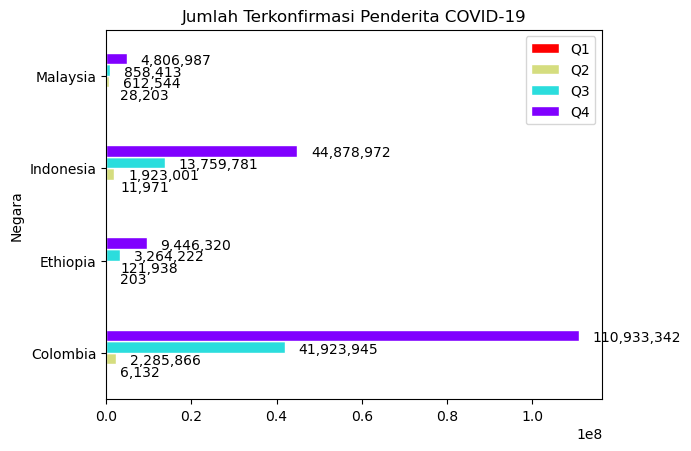

In [130]:
# plotting data pasien terkonfirmasi
ax = confirmed_q1_to_q4.plot(kind='barh',title="Jumlah Terkonfirmasi Penderita COVID-19",
xlabel='Negara',colormap='rainbow_r',edgecolor="white",linewidth=1)
for p in ax.patches:
    ax.annotate("{:,.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(10, 0),textcoords='offset points')

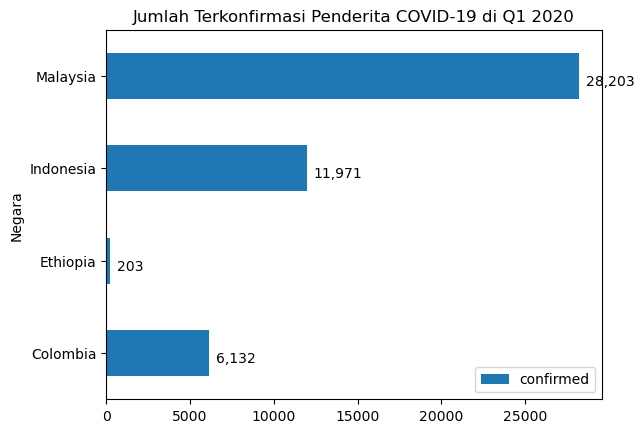

In [131]:
# Memplot ulang grafik perbandingan Q1 antar negara agar terlihat lebih jelas
ax = Q1.confirmed.plot(kind='barh', title='Jumlah Terkonfirmasi Penderita COVID-19 di Q1 2020', xlabel='Negara',legend=True)
for p in ax.patches:
    ax.annotate("{:,.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

Grafik diatas menunjukkan data terkonfirmasi penderita covid-19 antar negara tropis di masing masing benua pada tiap kuartal. Setiap negara mengalami kenaikan kasus terkonfirmasi covid-19 dari kuartal pertama hingga akhir. Terlihat bahwa Malaysia merupakan negara yang memilki pasien terkonfirmasi covid-19 paling sedikit pada akhir kuartal dua (Q2), tiga (Q3), dan empat (Q4), meskipun pada kuartal pertama (Q1) Malaysia mendapati angka tertiggi daripada negara lainnya dengan jumlah 28.203 pasien.

Sebaliknya dengan Colombia, mulai dari kuartal pertama (Q2) hingga kuartal keempat (Q4), negara Columbia terus mendapati pasien terkonfirmasi covid-19 terbanyak dimana puncaknya ada pada Q4 yakni total sebanyak 110.933.342.0 (seratus sepuluh juta sembilan ratus tiga puluh tiga ribu tiga ratus empat puluh dua) pasien yang pernah mengidap covid-19.

Angka pertumbuhan pasien terkonfimasi covid-19 di Indonesia relatif rendah jika dibandingkan dengan Colombia, mengingat di kuartal kedua (Q2) Indonesia dan Columbia memiliki pasien yang jumlahnya relatif mendekati.

Secara umum, urutan negara dengan jumlah pasien terkonfirmasi dari yang terendah hingga tertinggi adalah: Malaysia, Ethiopia, Indonesia, dan Colombia.

### Confirmed Case Rate

In [132]:
# Kelipatan jumlah kasus terkonfirmasi sepanjang kuartal dengan data Q1 tiap negara sebagai baseline value
rate_case_confirmed_q1_to_q4 = confirmed_q1_to_q4.apply(lambda x:x/confirmed_q1_to_q4['Q1'], axis=0).round()
rate_case_confirmed_q1_to_q4

,Q1,Q2,Q3,Q4
country,,,,
Colombia,1.0,373.0,"6,837.0","18,091.0"
Ethiopia,1.0,601.0,"16,080.0","46,534.0"
Indonesia,1.0,161.0,"1,149.0","3,749.0"
Malaysia,1.0,22.0,30.0,170.0


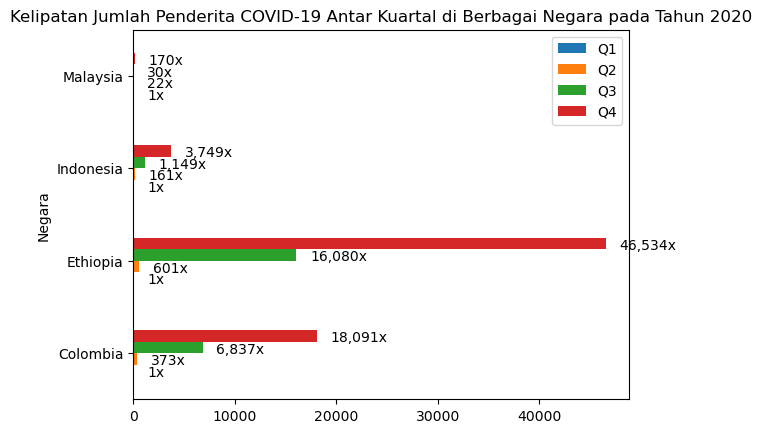

In [133]:
ax = rate_case_confirmed_q1_to_q4.plot(kind='barh', title='Kelipatan Jumlah Penderita COVID-19 Antar Kuartal di Berbagai Negara pada Tahun 2020', xlabel='Negara',legend=True)
for p in ax.patches:
    ax.annotate("{:,.0f}x".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(10, 0),textcoords='offset points')

Grafik diatas menunjukkan perbandingan kelipatan pertumbuhan pasien pengidap covid-19 dari Q1 hingga Q4 pada tahun 2020. Sebelumnya diketahui bahwa Malaysia merupakan negara yang memiliki pasien covid-19 terbanyak di kuartal pertama, namun pada grafik ini terlihat bahwa Malaysia adalah negara yang paling sukses menekan angka pasien terkonfirmasi covid-19 (diluar faktor external contohnya seperti pasien terkonfirmasi tidak melapor). 

Kesuksesan Malaysia dalam menekan angka pasien terkonfirmasi dapat dilihat pada pertumbuhan kelipatannya dari Q2 hingga Q4  Malaysia mendapati angka 22x, 30x, dan 170x dibandingkan dengan negara tropis lainnya yang sudah mencapai kelipatan ribuan bahkan puluh ribuan.

Selain hal tersebut, sebelumnya diketahui bahwa Ethiopia merupakan negara kedua yang paling sedikit setelah Malaysia dengan jumlah pasien terkonfirmasi covid-19. Namun, pada grafik diatas terlihat negara Ethiopia tidak dapat mempertahankan laju kelipatan persebaran covid-19 sebaik Malaysia, bahkan menjadi negara yang paling buruk diantara semua negara tropis lainnya untuk menekan laju pasien positif covid-19 dengan angka peningkatan tertinggi sebanyak 46,534x lipat di akhir kuartal keempat.

### Total Deaths

In [134]:
# menggabungkan data kematian antar kuartal dalam satu dataframe
deaths_q1_to_q4 = pd.concat([Q1.deaths.rename('Q1'),Q2.deaths.rename('Q2'),Q3.deaths.rename('Q3'),Q4.deaths.rename('Q4')],axis=1)

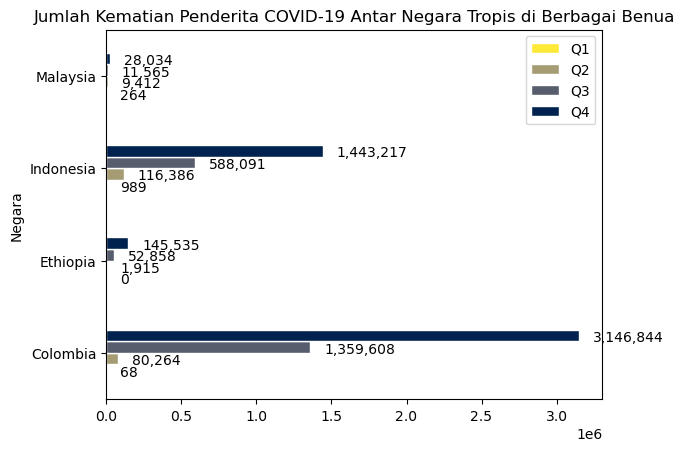

In [135]:
# plotting data kematian
ax = deaths_q1_to_q4.plot(kind='barh',title="Jumlah Kematian Penderita COVID-19 Antar Negara Tropis di Berbagai Benua",
xlabel='Negara',colormap='cividis_r',edgecolor='white',linewidth=1)
for p in ax.patches:
    ax.annotate("{:,.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(10, 0),textcoords='offset points')

### Mortality Rate

In [136]:
# menghitung mortality rate / rasio kematian pasien terkonfirmasi covid19
rate_mortality_q1_to_q4 = deaths_q1_to_q4/confirmed_q1_to_q4

In [137]:
rate_mortality_q1_to_q4

,Q1,Q2,Q3,Q4
country,,,,
Colombia,0.011089367253750815,0.035113169363383503,0.03243034499735175,0.028366980956906537
Ethiopia,0.0,0.015704702389739048,0.01619313882450397,0.015406528679951558
Indonesia,0.08261632278005179,0.06052310945236118,0.04273985174618695,0.03215797812837602
Malaysia,0.009360706307839592,0.015365426810155678,0.013472535947148983,0.0058319275671018045


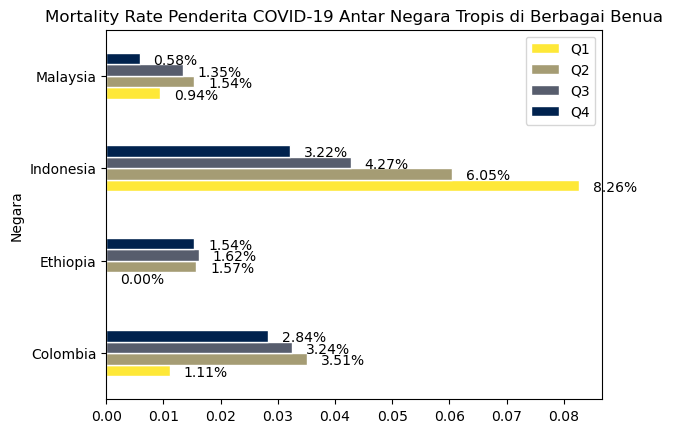

In [138]:
# plotting mortality rate
ax = rate_mortality_q1_to_q4.plot(kind='barh',title="Mortality Rate Penderita COVID-19 Antar Negara Tropis di Berbagai Benua",
xlabel='Negara',colormap='cividis_r',edgecolor='white',linewidth=1)
for p in ax.patches:
    ax.annotate("{0:.2%}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(10, 0),textcoords='offset points')

Grafik pertama menunjukan jumlah kematian terhadap pasien terkonfirmasi covid19 antar negara tropis di setiap kuartal pada tahun 2020. Puncak dari angka kematian terdapat pada kuartal empat (Q4), terlihat bahwa Colombia merupakan negara dengan kematian terbanyak dengan puncaknya mencapai lebih dari 3 juta orang pada Q4. Disusul oleh Indonesia dengan nilai puncak sekitar setengah dari Columbia yakni 1,4 juta orang lalu Ethiopia sebanyak 145 ribu orang dan terakhir yang paling sedikit 28 ribu orang di negara Malaysia.

Grafik kedua menunjukkan perbandingan rasio kematian terhadap pasien terkonfirmasi covid19, dari grafik ini terlihat bahwa pada Q1, kemungkinan seorang pasien mengalami kematian tergolong yang paling tinggi di negara Indonesia dengan angka mencapai 8.26%, dibandingkan dengan negara tropis lainnya sekitar 1% bahkan kurang. Seiring berjalannya waktu, rasio kematian di Indonesia mengalami penurunan yang signifikan pada kuartal-kuartal selanjutnya yakni pada angka 6.05% (Q2), 4.27% (Q3), dan 3.22% (Q4).

Negara Malaysia mendapat angka terendah pada penghujung kuartal yakni di angka 0.58%, hanya kalah dengan Ethiopia pada kuartal pertama.Pada Q2 terlihat sedikit kenaikan menjadi 1.54% namun tidak terlalu signifikan dan tetap konsisten terjadi penurunan rasio kematian hingga akhir kuartal dengan angka tertinggi tidak lebih dari angka pada kuartal kedua (Q2).

### Recovery Rate

In [139]:
# menggabungkan data kesembuhan antar kuartal dalam satu dataframe
recovered_q1_to_q4 = pd.concat([Q1.recovered.rename('Q1'),Q2.recovered.rename('Q2'),Q3.recovered.rename('Q3'),Q4.recovered.rename('Q4')],axis=1)

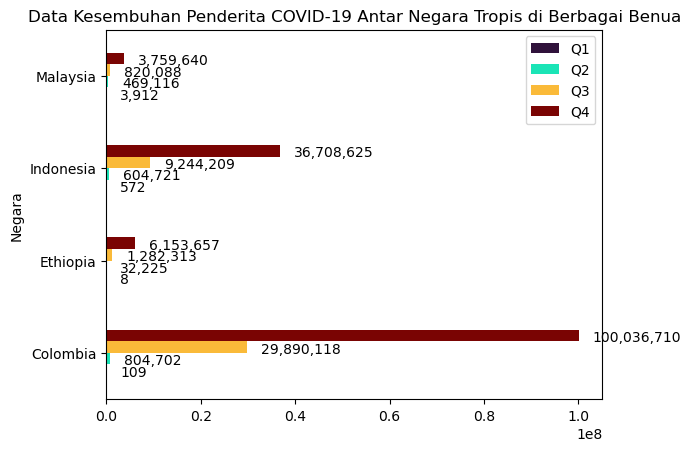

In [140]:
# plotting data kesembuhan
ax = recovered_q1_to_q4.plot(kind='barh',title="Data Kesembuhan Penderita COVID-19 Antar Negara Tropis di Berbagai Benua",
    xlabel='Negara',colormap='turbo')
for p in ax.patches:
    ax.annotate("{:,.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(10, 0),textcoords='offset points')

In [141]:
# menghitung recovery rate / rasio kematian pasien terkonfirmasi covid19
rate_recovery_q1_to_q4 = recovered_q1_to_q4/confirmed_q1_to_q4

In [142]:
rate_recovery_q1_to_q4

,Q1,Q2,Q3,Q4
country,,,,
Colombia,0.017775603392041747,0.35203375875926235,0.7129605288815258,0.9017731567124336
Ethiopia,0.03940886699507389,0.26427364726336333,0.39283878363665214,0.6514343151618831
Indonesia,0.04778214017208253,0.31446733517039255,0.6718282071495179,0.8179471000360703
Malaysia,0.1387086480161685,0.7658486574025702,0.9553536584371393,0.7821198601119579


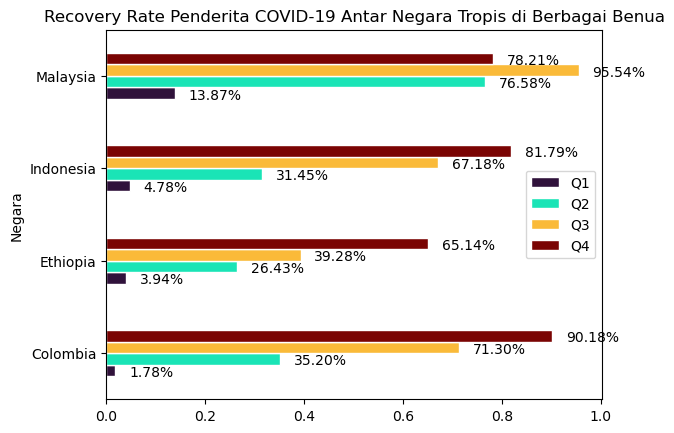

In [143]:
# plotting recovery rate
ax = rate_recovery_q1_to_q4.plot(kind='barh',title="Recovery Rate Penderita COVID-19 Antar Negara Tropis di Berbagai Benua",
xlabel='Negara',colormap='turbo',edgecolor='white',linewidth=1)
for p in ax.patches:
    ax.annotate("{0:.2%}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(10, 0),textcoords='offset points')

Grafik diatas menunjukkan laju kesembuhan pasien positif covid19 per kuartal antar negara tropis di berbagai benua pada tahun 2020. Data Q1 dan Q2 menunjukkan bahwa negara malaysia memiliki angka laju kesembuhan terbesar, yakni 13.87% (Q1) dan 76.58% (Q2) artinya dua kali lipat jika dibandingkan negara tropis lainnya. Negara tropis lainnya mencapai laju kesembuhan paling tinggi tidak lebih dari 5% untuk Q1 dan tidak lebih dari 35% pada Q2. Laju kesembuhan tertinggi pada Q3 dimiliki negara Malaysia yang mencapai angka 95.54% dan pada Q4 dimiliki negara Columbia sebesar 90.18%

## Conclusions, Assumptions, Overall Analysis

- Secara umum, Malaysia adalah negara terbaik dalam penanganan covid19 diantara negara tropis lainnya. Hal ini didukung oleh data jumlah kelipatan pasien positif, mortality rate yang terendah, dan recovery rate yang tinggi meskipun memiliki jumlah pasien terkonfirmasi terbanyak pada Q1.
- Kesigapan Malaysia dalam penanganan covid19 terlihat dari data mortality rate yang rendah dan recovery rate yang sangat jauh tinggi di awal Q1 dan Q2 dibandingkan negara lainnya.
- Indonesia terlihat tidak siap menghadapi covid19 pada awal tahun 2020 yang tercermin dari data mortality rate yang relatif tinggi pada Q1. Namun Indonesia cepat pulih untuk meminimalkan angka kematian di kuartal-kuartal selanjutnya
- Pencegahan penyebaran covid19 di Ethiopia sangatlah buruk hingga mencapai angka 46rb kali lipat pada akhir Q4 jika dibandingkan dengan data Q1 negara tersebut namun rasio kematian di negara tersebut tetaplah rendah. 
- Dengan recovery rate yang relatif sama dengan Indonesia namun mortality rate yang jauh berbeda, dapat dikatakan kasus covid19 di negara Ethiopia tidaklah se-fatal di Indonesia.
- Semua negara tropis pada tiap benua hendaklah mencontoh Malaysia dalam menangani wabah covid19, khususnya negara Indonesia dengan pertimbangan letak geografis yang tidak begitu jauh terpisah dan kondisi iklim yang relatif sama.
